# CS457 Assignment 2 - Question 1

### Student Name: Huda Feroz Ahmed
### Student ID: 04081
### Student Email: ha04081@st.habib.edu.pk

## Retail Data :

 You are given a typical Order processing dataset of a retail company. You need to use python data science libraries to look into the dataset to gain insight of data and identify interesting trends/patterns.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

## Loading data from CSV

Load data from the given CSV file.

In [2]:
data = pd.read_csv('Retail.csv')

************************************************************************************************************
## Know your data

Let's chech some sample records to have a feel of data you are going to work with

In [3]:
data.head(10)

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
3,SO43843,"Mountain-100 Black, 44",Black,Bikes,Mountain Bikes,NaN,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,5,2024.9940,10124.9700,0.0,809.9976,253.1243
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
5,SO43843,"HL Mountain Frame - Silver, 48",Silver,Components,Mountain Frames,1364.5000,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,1,818.7000,818.7000,0.0,65.4960,20.4675
6,SO43843,"HL Mountain Frame - Black, 48",Black,Components,Mountain Frames,1349.6000,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,Nan,809.7600,809.7600,0.0,64.7808,20.2440
7,SO43843,"Mountain-100 Silver, 38",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
8,SO43843,"Mountain Bike Socks, M",White,Clothing,Socks,9.5000,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,5.7000,11.4000,0.0,0.9120,0.2850
9,SO43843,"Mountain-100 Black, 42",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,3,2024.9940,6074.9820,0.0,485.9986,151.8746


Check the number of rows and columns that your dataset has:

In [4]:
data.shape

(32040, 17)

Check datatype of each attribute

In [5]:
data.dtypes

OrderNumber        object
ProductName        object
Color              object
Category           object
Subcategory        object
ListPrice         float64
Orderdate          object
Duedate            object
Shipdate           object
PromotionName      object
SalesRegion        object
OrderQuantity      object
UnitPrice         float64
SalesAmount       float64
DiscountAmount    float64
TaxAmount         float64
Freight           float64
dtype: object

Set the data types correctly...

In [7]:
data['Orderdate'] =  pd.to_datetime(data['Orderdate'])
data['Duedate'] =  pd.to_datetime(data['Duedate'])
data['Shipdate'] =  pd.to_datetime(data['Shipdate'])
data['OrderQuantity'] = pd.to_numeric(data['OrderQuantity'], errors='coerce')

How many distinct values does each column have?

In [8]:
data.nunique()

OrderNumber       1871
ProductName        250
Color                8
Category             4
Subcategory         33
ListPrice          103
Orderdate           17
Duedate             17
Shipdate            17
PromotionName        7
SalesRegion         10
OrderQuantity       37
UnitPrice          214
SalesAmount       1271
DiscountAmount     382
TaxAmount         1271
Freight           1266
dtype: int64

Use describe method to check basic statiscal measures of your data like count, mean, min, max, std quantiles etc

In [9]:
data.describe()

,ListPrice,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
count,32032.000000,32024.000000,32040.000000,32040.000000,32040.00000,32040.000000,32040.000000
mean,714.663419,3.626468,424.122103,1299.023131,8.15285,103.921849,32.475594
std,851.623778,3.116480,506.799303,2153.316625,78.40708,172.265331,53.832916
min,2.290000,1.000000,1.328200,1.374000,0.00000,0.109900,0.034400
25%,54.990000,2.000000,32.994000,125.964000,0.00000,10.077100,3.149100
50%,337.220000,3.000000,202.332000,445.410000,0.00000,35.632800,11.135300
75%,1079.990000,5.000000,647.994000,1457.820000,0.00000,116.625600,36.445500
max,3578.270000,40.000000,2146.962000,27893.619000,4005.23760,2231.489500,697.340500


# Data Cleaning

There are some error in the dataset that you need to fix:

How many null values are there in each columns?
    
    


In [10]:
data.isnull().sum(axis = 0)

OrderNumber          0
ProductName          0
Color             2967
Category             0
Subcategory          0
ListPrice            8
Orderdate            0
Duedate              0
Shipdate             0
PromotionName        0
SalesRegion         15
OrderQuantity       16
UnitPrice            0
SalesAmount          0
DiscountAmount       0
TaxAmount            0
Freight              0
dtype: int64

- Some of the products have Quantity as Null, you need to set their quantity to 1.

In [11]:
data['OrderQuantity'].fillna(1,inplace=True)

- Some of the products have Null List Price, set their price as the mean of that product price in other orders.
    

In [12]:
data['ListPrice'].fillna(data['ListPrice'].mean(),inplace=True)

- Some orders do not have a sales region assigned, you need to remove such order lines

In [13]:
data= data[data['SalesRegion'].notna()]

- Some orders have Due date less than Order date, due date should be set as Order data in such cases.

In [14]:
# no due date is less than orderdate
data.loc[data['Duedate'] < data['Orderdate']]

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight


Do you feel there are outliers in the data? Let's eliminate extreme values (if any) in Order Sales Amount. 
Note: Extreme values can be seen as those outside +/- 3 standard deviation. 

Do you think this is wise to identify outliers this way?


In [15]:
zscore = (data['SalesAmount'] - data['SalesAmount'].mean())/data['SalesAmount'].std()
data = data.drop(zscore[(abs(zscore) > 3)].index)
data.shape

(31233, 17)

Answer: It is not wise. The Z-score method relies on the mean and standard deviation of a group of data to measure central tendency and dispersion. This is troublesome, because the mean and standard deviation are highly affected by outliers – they are not robust. In fact, the skewing that outliers bring is one of the biggest reasons for finding and removing outliers from a dataset!

# Data Exploration

Check how many products have been sold under each category.

In [16]:
data.groupby("Category")['OrderNumber'].count()

Category
Accessories     2810
Bikes          11456
Clothing        6522
Components     10445
Name: OrderNumber, dtype: int64

Draw boxplot of cateogry vs product list price to compare prices of products across categories.

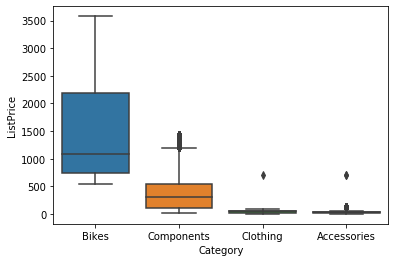

In [42]:
sns.boxplot(y= data['ListPrice'], x = data['Category'])

analysis: boxplot is slightly positively skewed with presence of only a few outliers in clothing and accessories. 

Plot bar chart and pie chart to see total sales of products in each category.

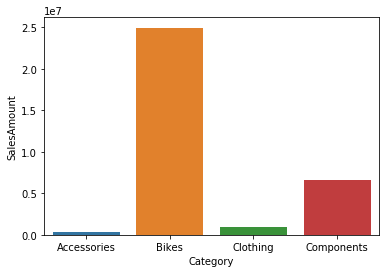

In [43]:
#barchart
df_cat = data.groupby('Category').sum()
df_cat.reset_index(inplace=True)
sns.barplot(x='Category', y='SalesAmount', data=df_cat)
#most sold

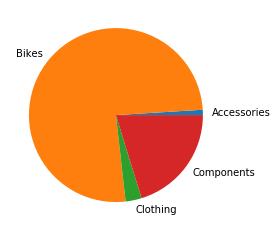

In [20]:
#piechart
catSalesGroupSum = data.groupby("Category")['SalesAmount'].sum()
plt.pie(catSalesGroupSum.values, labels = catSalesGroupSum.index)
plt.show()

Analysis: boxplot is slightly positively skewed with presence of only a few outliers in clothing and accessories. most sales were generated by selling bikes, followed by components, clothing & acessories respectively. 

In [ ]:
# Write your analysis after every question. Select Markdown from top menu instead of Code and then execute the cell

---------------------------------------------
Plot histogram of all numeric attrubites to see their distribution

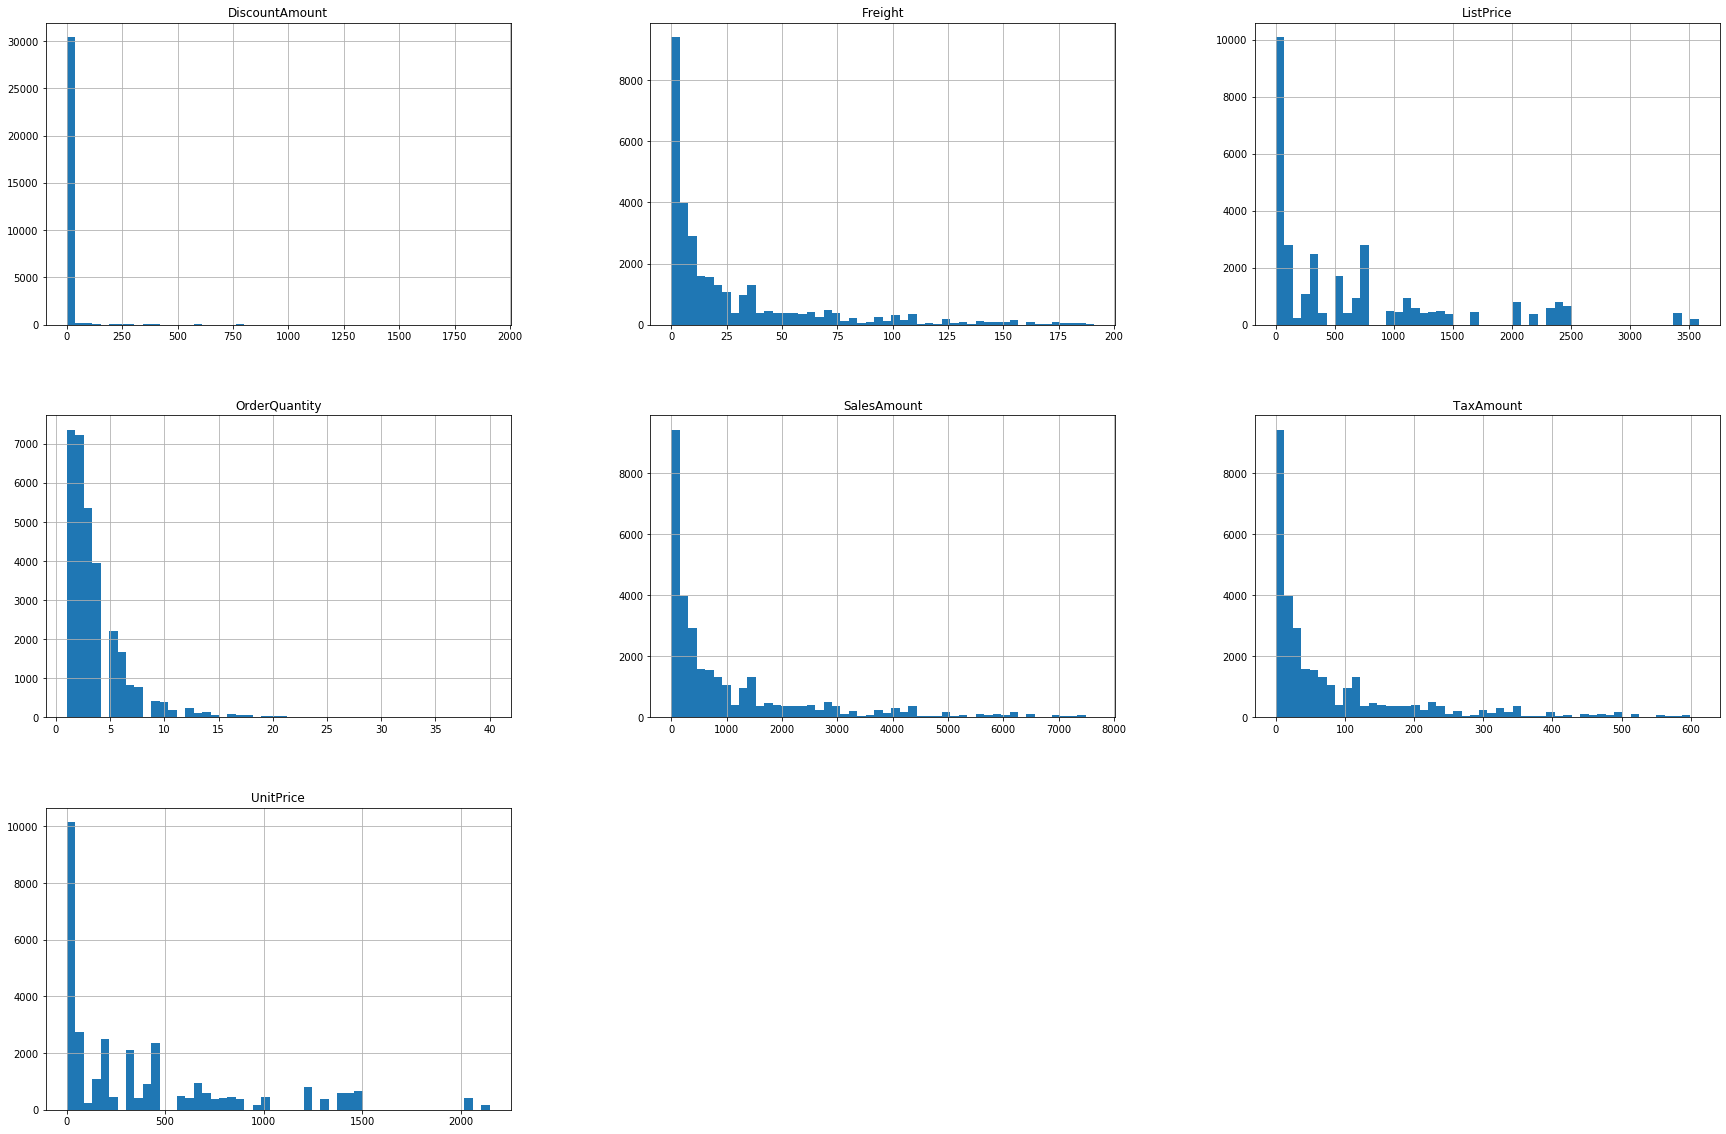

In [21]:
data.hist(bins=50, figsize=(30,20))
plt.show()

Analysis: [1] Discount Amount: There was a discount on very few orders 
[2] Most orders had low freight
[3] Price: most orders were of low prices
[4] Order Quantity: Most people ordered only 1-5 products
[5] Sales Amount: Sales was mostly between 1 to 500.
[6] TaxAmount: Most orders were taxed between 1 to 50.

All data is skewed to right.



Plor bar chart for categorial attributes Category, SubCategory, Promotion and Region.

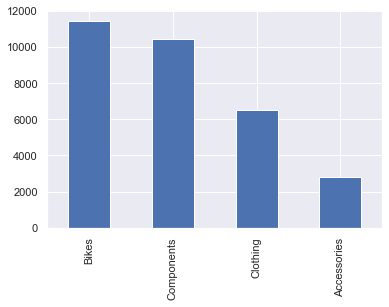

In [161]:
data['Category'].value_counts().plot(kind='bar')

Analysis: most orders are of category bikes, followed by components, clothing & acessories respectively.

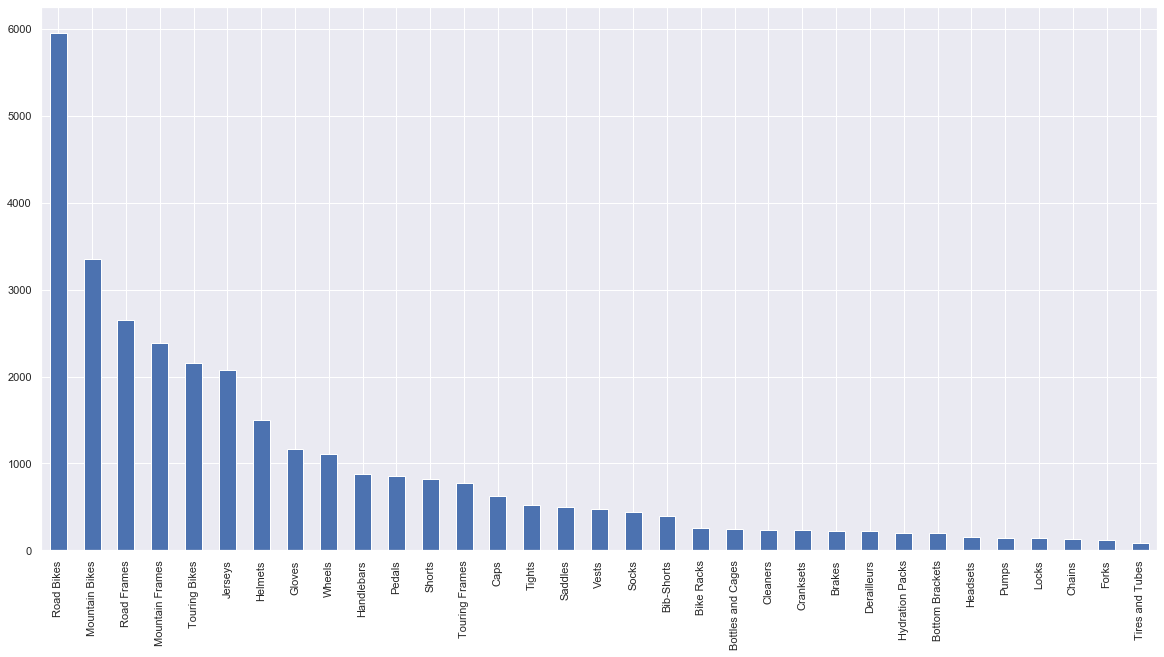

In [160]:
data['Subcategory'].value_counts().plot(kind='bar', figsize=(20,10))

Analysis: most orders are of subcategory Road Bikes and lowest of tyres & tubes.

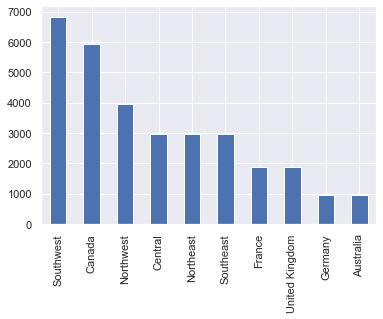

In [159]:
#Region
data['SalesRegion'].value_counts().plot(kind='bar')

Analysis: most orders were made in SouthWest are area and lowest in Australia. 

Plot bar chart for promotions. You need to exclude 'No Discount' data while plotting bar chart.

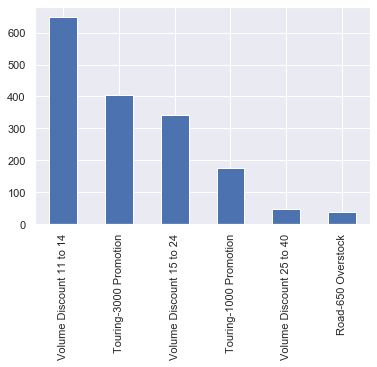

In [158]:
#Promotion
data['PromotionName'][data['PromotionName'] != "No Discount"].value_counts().plot(kind='bar')

Analysis: most availed discount was volume discount and lowest availed discoutn was road-650 overstock

In [ ]:
# Write your analysis after every question. Select Markdown from top menu instead of Code and then execute the cell

Plot number of orders placed on each day of week. Is there any interesting trend?

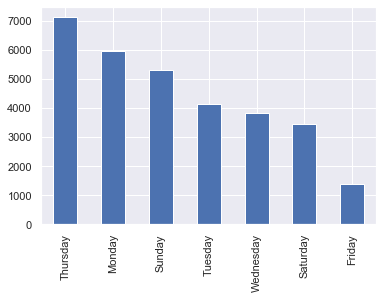

In [157]:
(data["Orderdate"].dt.weekday_name).value_counts().plot(kind='bar')

Analysis: Most orders were placed on Thursday and then Monday, while lowest on Friday. Orders were placed both on weekends and workdays. 

Is there any impact of promotion on overall product sales?

C:\Users\Huda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


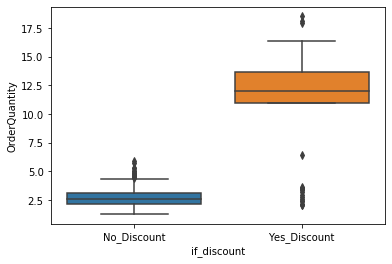

In [51]:
data['if_discount'] = 'Yes_Discount'
data['if_discount'][data['PromotionName'] == "No Discount"] = 'No_Discount'
discount_on_products = data.groupby(by = ["ProductName", "if_discount"], as_index = False).mean()
sns.boxplot(x = 'if_discount', y = 'OrderQuantity', data = discount_on_products)

Analysis: Yes, there is an impact of promotion on overall product sales. Although, there are some outliers which show at some instances discounted products were sold in range of not discounted products, in general discounted products were much more than not discounted products

Insert a new column 'ProcessingDays' which is calculated as ShippedDate - OrderDate

In [32]:
data['ProcessingDays'] = (data['Shipdate'] - data['Orderdate']).dt.days #dt.days to remove "days" and cover to number of days for each element
data["ProcessingDays"]

0        7
1        7
2        7
4        7
5        7
        ..
32035    7
32036    7
32037    7
32038    7
32039    7
Name: ProcessingDays, Length: 31233, dtype: int64

What is the average processing time? Are there deviations from that average? Draw boxplot of ProcessingDays to analyse. 
Do you see any outlier here?

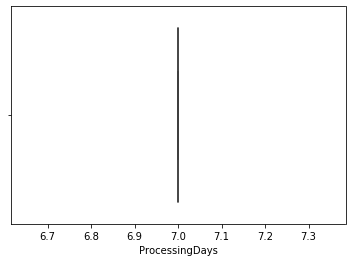

In [33]:
sns.boxplot(data['ProcessingDays'])

Analysis: Average time is 7. There are no deviations from average. There are no outliers. 

Perform some analysis on the number of products in an order. What is their average, min, max etc. Use appropriate tools to present a summary of this information.

In [34]:
data.groupby("OrderNumber").count()['ProductName'].describe()

count    1866.000000
mean       16.737942
std        16.411185
min         1.000000
25%         3.000000
50%        10.000000
75%        27.000000
max        68.000000
Name: ProductName, dtype: float64

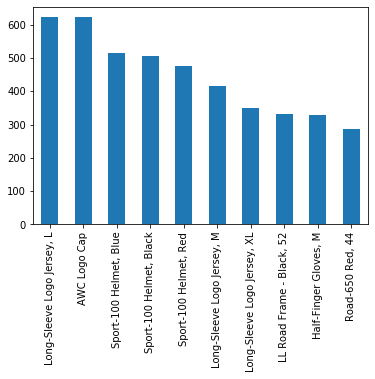

In [78]:
#shows 10 most ordered products
data['ProductName'].value_counts()[:10].plot(kind='bar')

Analysis: most sold produts are long sleve jersey and AWC cap. 

Perform some other meaningful analysis on the data and present your findings.

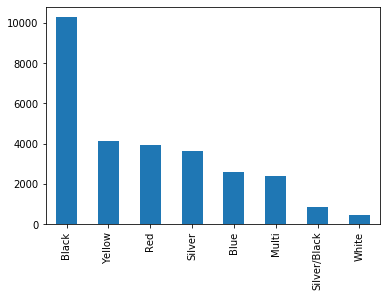

In [39]:
data['Color'].value_counts().plot(kind='bar')

Analysis: Black color products are sold most while White color products are least sold. 

## Normalization

Create a new column 'NormalizedPrice' that contains normalized ListPrice of products. Z-Score normalization will be performed.

In [40]:
data['NormalizedPrice'] = (data['ListPrice'] - data['ListPrice'].mean())/data['ListPrice'].std()

Is product price following a normal distribution? Is it skewed? Plot histogram.

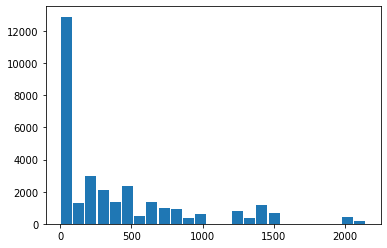

In [92]:
plt.hist(x=data.UnitPrice, bins=25, rwidth=0.9)
plt.show()

Analysis: product price is not following a normal distribution and is skewed to the right.

Let's update UnitPrice by its log and then plot histogram. Is there any change?

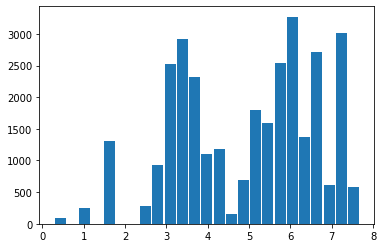

In [93]:
data['logUnitPrice'] = np.log(data['UnitPrice'])
plt.hist(x=data.logUnitPrice, bins=25, rwidth=0.9)
plt.show()

Analysis: after log transformation the distribution conforms to normality

Let's investigate if prices within categories are normally distributed and present your analysis.

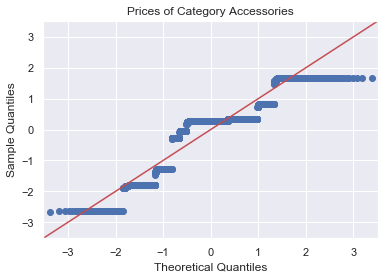

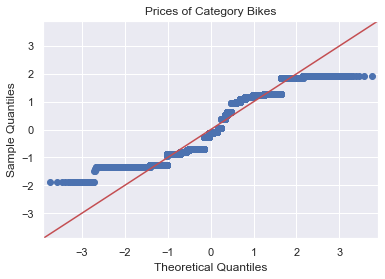

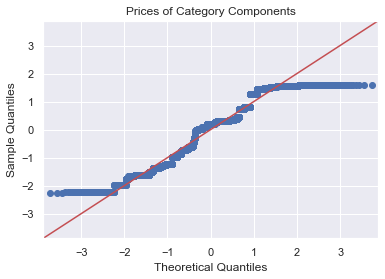

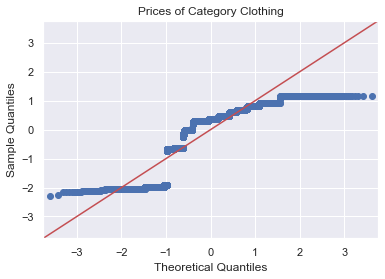

In [181]:
import statsmodels.api as sm
unique_cat = (set(data['Category']))
for i in unique_cat:
    sm.qqplot(data[data['Category'] == i]['logUnitPrice'], line = '45', fit = True)
    plt.title("Prices of Category " + i)
    plt.show()

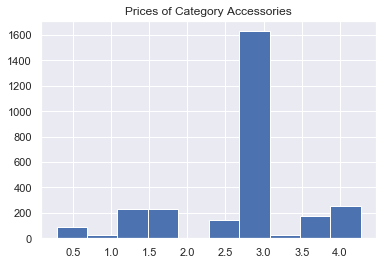

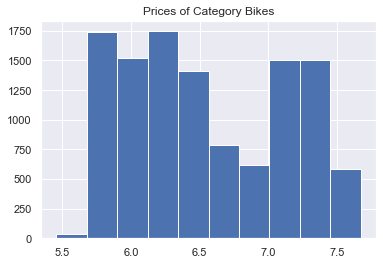

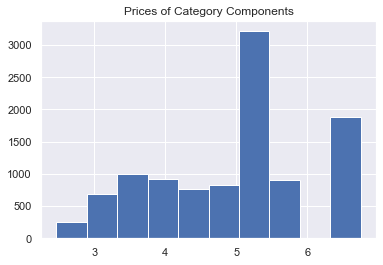

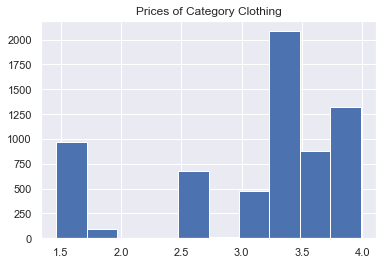

In [182]:
for i in unique_cat:
    data[data['Category'] == i]['logUnitPrice'].hist()
    plt.title("Prices of Category " + i)
    plt.show()

Analysis: Only Components shows normal distribution while distribution of others is not normal.

In [ ]:
# Write your analysis after every question. Select Markdown from top menu instead of Code and then execute the cell

Product prices are on a continuous scale. You want to descritize them. User KBinDiscretizer to find boundaries using:
- equal bin discretization 
- equal frequency discretization
- kmeans discretization

Which one do you think is better?

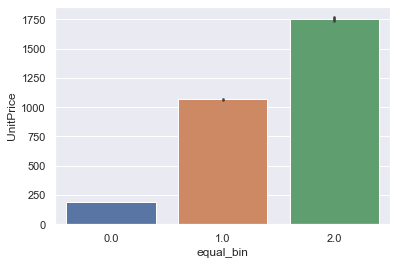

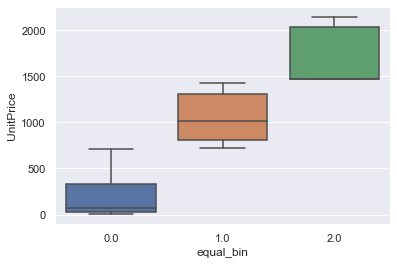

In [193]:
#Equal-bin
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'uniform')
data['equal_bin'] = est.fit_transform(np.reshape(data['UnitPrice'].values, (-1, 1)))

sns.barplot(x = data['equal_bin'], y = data['UnitPrice'])
plt.show()
sns.boxplot(x = data['equal_bin'], y = data['UnitPrice'])
plt.show()

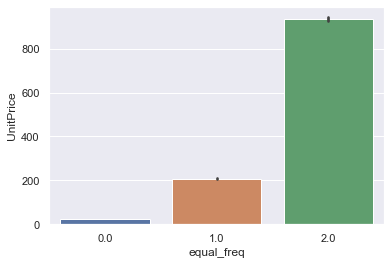

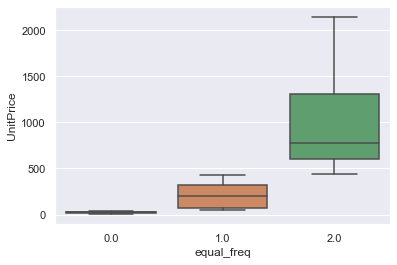

In [194]:
#Equal- Frequesncy
est = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'quantile')
data['equal_freq'] = est.fit_transform(np.reshape(data['UnitPrice'].values, (-1, 1)))

sns.barplot(x = data['equal_freq'], y = data['UnitPrice'])
plt.show()
sns.boxplot(x = data['equal_freq'], y = data['UnitPrice'])
plt.show()

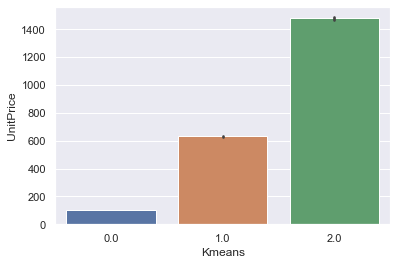

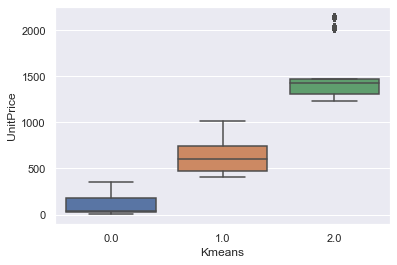

In [196]:
#Kmeans
est = KBinsDiscretizer(n_bins = 3, encode = 'ordinal', strategy = 'kmeans')
data['Kmeans'] = est.fit_transform(np.reshape(data['UnitPrice'].values, (-1, 1)))

sns.barplot(x = data['Kmeans'], y = data['UnitPrice'])
plt.show()
sns.boxplot(x = data['Kmeans'], y = data['UnitPrice'])
plt.show()

Analysis: Our logUnitPrice data is evenly distributed and most of our data is at 3 points so we need our binning to include these this clustering of data.
<li> Equal width bin: this accounts for the clusteing of data but the last bin does not completely cover the clustering</li> 
<li> equal frequency: this binning does not cover the clustering of data </li>
<li> kmeans: is similiar to equal bin but last bin also takes custering of data into account so is better of all.</li>

### Correlation:
Study correlation between attributes via:
- correlation coefficients
- scatter plot matrix
- plotting heatmap

You can focus on numeric attributes for this.

In [205]:
#correlation coefficients
numeric_cols = ['ListPrice', 'OrderQuantity', 'UnitPrice', 'SalesAmount', 'DiscountAmount', 'Freight', 'TaxAmount']
data_numeric_col = data[numeric_cols]
cor_mat = (data_numeric_col.corr())

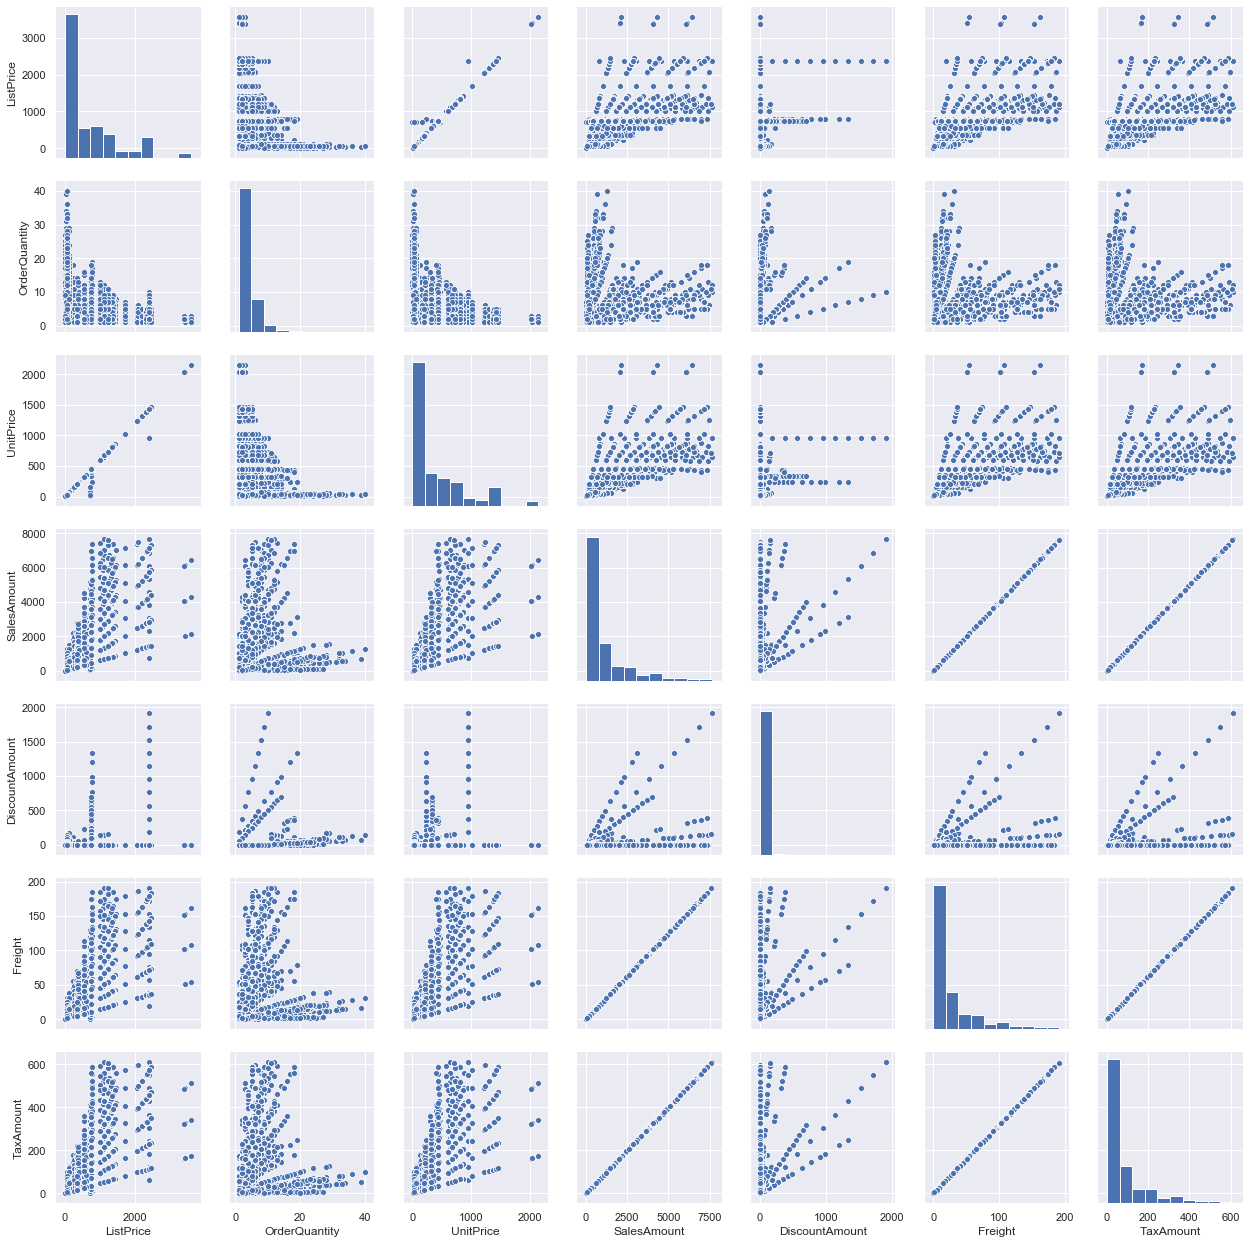

In [212]:
#Scatter plot
sns.pairplot(data_numeric_col)
plt.show()

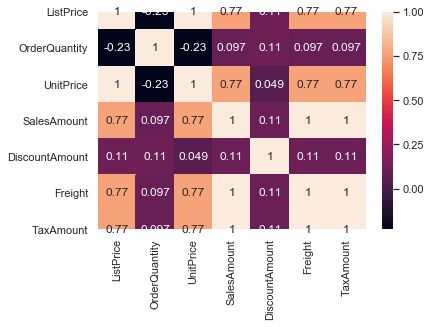

In [213]:
#Heatmap
sns.heatmap(cor_mat, annot = True)
plt.show()

High correlation with each other: 
<li>Price (Unit and List) and Sales Amount, Freight, and Tax Amount</li>
<li>Unit price and Sales Amount, Freight, and Tax Amount</li> 

Perfect correlation with each other: 
<li>Price and Sales Amount </li>
<li>Sales Amount, Tax Amount, and Freight </li>